0.663433743503878


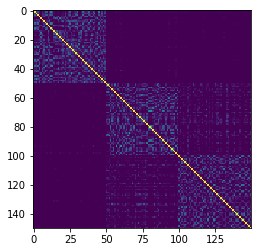

In [12]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest

iris = load_iris()

X = iris.data
y = iris.target

clf = UnsupervisedRandomForest(n_estimators=100, max_depth=5, random_state=0)
clf.fit(X)
sim_mat = clf.transform()
plt.imshow(sim_mat)
cluster = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average')
predict_labels = cluster.fit_predict(1-sim_mat)
score = adjusted_rand_score(y, predict_labels)
print(score)

In [13]:
mat = clf.forest_._return_pair_mat()
mat

{(0, 0): 100.0,
 (0, 1): 11.0,
 (0, 2): 19.0,
 (0, 3): 3.0,
 (0, 4): 47.0,
 (0, 6): 20.0,
 (0, 7): 24.0,
 (0, 8): 5.0,
 (0, 9): 1.0,
 (0, 10): 7.0,
 (0, 11): 7.0,
 (0, 12): 5.0,
 (0, 14): 13.0,
 (0, 16): 7.0,
 (0, 17): 38.0,
 (0, 19): 6.0,
 (0, 20): 11.0,
 (0, 21): 5.0,
 (0, 22): 15.0,
 (0, 23): 4.0,
 (0, 24): 8.0,
 (0, 25): 12.0,
 (0, 26): 6.0,
 (0, 27): 24.0,
 (0, 28): 37.0,
 (0, 29): 8.0,
 (0, 30): 3.0,
 (0, 31): 1.0,
 (0, 32): 8.0,
 (0, 33): 17.0,
 (0, 34): 3.0,
 (0, 35): 21.0,
 (0, 36): 38.0,
 (0, 37): 31.0,
 (0, 38): 6.0,
 (0, 39): 27.0,
 (0, 40): 33.0,
 (0, 41): 1.0,
 (0, 42): 18.0,
 (0, 43): 7.0,
 (0, 44): 3.0,
 (0, 45): 3.0,
 (0, 46): 11.0,
 (0, 47): 18.0,
 (0, 48): 9.0,
 (0, 49): 32.0,
 (0, 98): 1.0,
 (1, 0): 5.0,
 (1, 1): 100.0,
 (1, 2): 20.0,
 (1, 3): 25.0,
 (1, 4): 6.0,
 (1, 6): 7.0,
 (1, 7): 4.0,
 (1, 8): 29.0,
 (1, 9): 28.0,
 (1, 10): 1.0,
 (1, 11): 9.0,
 (1, 12): 44.0,
 (1, 13): 20.0,
 (1, 14): 3.0,
 (1, 17): 2.0,
 (1, 20): 2.0,
 (1, 22): 7.0,
 (1, 23): 1.0,
 (1, 24): 9

0.7861639322874198


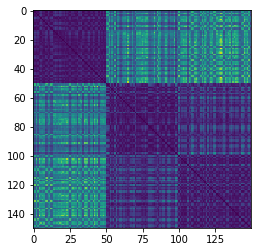

In [18]:
import numpy as np

n = len(X)
nca = np.zeros([n, n])

for depth in range(5):
    clf = UnsupervisedRandomForest(n_estimators=100, max_depth=depth, random_state=0)
    clf.fit(X)
    sim_mat = clf.transform()
    nca += sim_mat*(depth+1)

nca = [1/x for x in nca]    

plt.imshow(nca)
cluster = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="average")
predict_labels = cluster.fit_predict(nca)
score = adjusted_rand_score(y, predict_labels)
print(score)

In [7]:
from sklearn.ensemble import RandomTreesEmbedding

def NCA(forest, samples):
    
    n_sample = samples.shape[0]
    d = np.zeros([n_sample, n_sample])
    n_estimator = len(forest)

    for k in range(n_estimator):
    
        tree = forest[k]
    
        path = tree.decision_path(samples).todense()
    
        for i in range(n_sample):
            for j in range(n_sample):
                sample_ids = [i, j]
                d[i, j] = d[i, j]+(path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
            

    d = d / n_estimator
    d_Nearest_Common_Ancestor = [1/x for x in d]
    
    return d_Nearest_Common_Ancestor

0.745503868180448


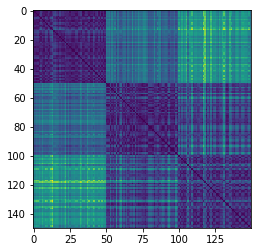

In [8]:
clf = RandomTreesEmbedding(n_estimators=50, random_state=0, max_depth=5)
clf.fit(samples)
forest = clf.estimators_

d_nca= NCA(forest, samples)

plt.imshow(d_nca)
cluster = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="average")
predict_labels = cluster.fit_predict(nca)
score = adjusted_rand_score(y, predict_labels)
print(score)